### Import Necessary Libraries

In [17]:
import os
import json
import matplotlib.pyplot as plt
import time
import requests
import datetime
import dateutil
import pandas as pd
import time
import numpy as np
from dateutil.relativedelta import relativedelta
import yfinance as yf
import re
import seaborn as sns

# Data Collection
- New York Times API Extraction:
- Data Preprocessing

In [3]:
# Function to generate regex patterns for phrases with words in any order
def generate_patterns(phrases):
    patterns = []
    for phrase in phrases:
        words = phrase.split()
        # Generate a pattern that matches the words in any order
        pattern = r'\b' + r'\b.*\b'.join(words) + r'\b'
        patterns.append(re.compile(pattern, re.IGNORECASE))
    return patterns


phrases = [
    "USDEUR Exchange", "Euro Strength", "US Dollar Trends", "ECB Monetary Policy", "Fed Interest Rates",
    "EU Economic Growth", "US Fiscal Policy", "Eurozone Inflation", "US Trade Deficit", "EURUSD Forex",
    "US Employment Data", "EU Trade Agreement", "Brexit Impact EUR", "US Inflation Data", "ECB Interest Rate",
    "Bank of England Monetary Policy", "Federal Reserve Policy", "GBPUSD Forecast", "USDGBP Analysis",
    "Interest Rate Decision GBP USD", "Quantitative Easing USD GBP", "Inflation Rates GBP vs USD",
    "UK Economic Indicators", "US Economic Outlook", "Brexit Negotiations Impact", "UK Inflation Impact on GBP",
    "US GDP Growth", "UK GDP Announcements", "Federal Open Market Committee (FOMC) Decisions",
    "Bank of England Interest Rate Decisions", "Financial Market Sentiment GBP USD",
    "Geopolitical Tensions Impact on Currencies", "Trade Balance UK and US", "Currency Market Volatility GBP USD",
    "Sterling Dollar Exchange Outlook", "Dollar Pound Rate Predictions", "Central Bank Communications Impact",
    "Global Economic Events GBP USD", "Monetary Policy Divergence US UK", "Fiscal Stimulus Impact on GBP USD"
]


# Generate patterns
patterns = generate_patterns(phrases)

# Function to check if text in any given column matches any pattern.
def matches_any_pattern(row, columns, patterns):
    for col in columns:
        text = row.get(col, '')
        if pd.notnull(text):
            for pattern in patterns:
                if pattern.search(text):
                    return True
    return False

# Columns to check for each row
columns_to_check = ['headline', 'abstract', 'lead_paragraph']

# Apply the function to each row across the specified columns
df['matches_query'] = df.apply(lambda row: matches_any_pattern(row, columns_to_check, patterns), axis=1)

# Filter DataFrame to only include rows where the text in any of the specified columns matches any of the patterns
filtered_df = df[df['matches_query']]

# Display the filtered DataFrame
print(filtered_df)



KeyboardInterrupt



In [10]:
# Save the filtered DataFrame to a CSV file
#filtered_df.to_csv('filtered_data100.csv', index=False)


In [2]:
data = pd.read_csv('filtered_data100.csv', parse_dates = True, index_col = 0)

In [3]:
data.index.names = ['Date']

In [4]:
Data = data[::-1].copy()

In [5]:
Data.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,...,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name,query,matches_query
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-23 05:00:00+00:00,Economic policy makers in developing countries...,https://www.nytimes.com/2008/02/23/opinion/23s...,Economic policy makers in developing countries...,As the Federal Reserve cut interest rates by a...,A,16.0,The New York Times,[],{'main': 'The Double Standard in Crisis Resolu...,"[{'name': 'subject', 'value': 'Third World and...",...,Editorial,Opinion,"{'original': 'By Eduardo Porter', 'person': [{...",Editorial,nyt://article/8aa5062f-80c0-5ae7-a7c7-4064368e...,757.0,nyt://article/8aa5062f-80c0-5ae7-a7c7-4064368e...,NaN,US Fiscal Stimulus,True
2021-12-19 12:00:08+00:00,"Central banks in the United States, Britain an...",https://www.nytimes.com/2021/12/19/business/th...,"Central banks in the United States, Britain an...",The Federal Reserve signaled on Wednesday that...,BU,2.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'The Week in Business: Taking On Infl...,"[{'name': 'subject', 'value': 'United States E...",...,SundayBusiness,Business Day,"{'original': 'By Sarah Kessler', 'person': [{'...",News,nyt://article/94fec3bd-012c-5738-9b72-e58dfd4d...,757.0,nyt://article/94fec3bd-012c-5738-9b72-e58dfd4d...,NaN,Britain,True
2018-12-16 12:00:01+00:00,It's back to the drawing board on Britain’s fl...,https://www.nytimes.com/2018/12/16/business/th...,It's back to the drawing board on Britain’s fl...,"Hi there! Here you are, rushing around with to...",BU,2.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'The Week in Business: Apple Expands ...,"[{'name': 'organizations', 'value': 'Apple Inc...",...,SundayBusiness,Business Day,"{'original': 'By Charlotte Cowles', 'person': ...",News,nyt://article/c947d2d2-29f5-5951-bb71-29fdc785...,965.0,nyt://article/c947d2d2-29f5-5951-bb71-29fdc785...,NaN,Britain,True
2017-06-18 22:36:48+00:00,"Two years after a Chinese stock market crash, ...",https://www.nytimes.com/2017/06/18/business/ch...,"Two years after a Chinese stock market crash, ...",BEIJING — While investors have been preoccupie...,B,6.0,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Some Global Investors See Fresh Worr...,"[{'name': 'subject', 'value': 'Economic Condit...",...,Business,Business Day,"{'original': 'By Michael Schuman', 'person': [...",News,nyt://article/6916a756-fb89-5649-af11-5c4d047c...,1088.0,nyt://article/6916a756-fb89-5649-af11-5c4d047c...,NaN,Britain,True
2012-12-10 19:49:26+00:00,"In a speech in New York, Mervyn A. King said h...",https://www.nytimes.com/2012/12/11/business/br...,"In a speech in New York, Mervyn A. King said h...","Mervyn A. King, the outgoing governor of the B...",B,3.0,The New York Times,[],{'main': 'Britain’s Departing Central Banker I...,"[{'name': 'subject', 'value': 'International T...",...,Business,Business Day,"{'original': 'By Catherine Rampell', 'person':...",News,nyt://article/2b342a1d-fe5e-51b5-95d3-0a8644cd...,639.0,nyt://article/2b342a1d-fe5e-51b5-95d3-0a8644cd...,NaN,Britain,True


# NLP Sentiment Analysis
- Sentiment Extraction using NLP tools

In [11]:
#pip install TextBlob

In [6]:
from textblob import TextBlob
def estimate_polarity(text):
    return TextBlob(text).sentiment.polarity

In [7]:
# Correctly combine the text from 'abstract', 'headline', 'snippet', and 'lead_paragraph' columns into a single string
data['combined_text'] = data.apply(lambda x: ' '.join([str(x['abstract']), str(x['headline']), str(x['snippet']), str(x['lead_paragraph'])]), axis=1)

# Apply the sentiment analysis on the combined text
Data = data.assign(sentiment=lambda x: x['combined_text'].apply(estimate_polarity))



In [8]:
# Average sentiment for each date. 

Data = Data[['sentiment']].groupby(Data.index.date).mean()
Data.index = pd.to_datetime(Data.index)

In [9]:
import yfinance as yf

# Ticker for British Pound to US Dollar exchange rate
asset = "GBPUSD=X"

# Download historical data for GBP to USD exchange rate
asset = yf.download(asset, start="2003-06-01")[["Open"]].shift(-1).copy()

#data.head()

[*********************100%%**********************]  1 of 1 completed


# Hyperparameter Optimization

**Exponential Weighted Moving Average (EWMA):** This is a type of moving average that gives more weight to recent data points, making it more responsive to new information. (k_values ) This is used to smooth the sentiment signal over time, making it easier to identify trends in underlying sentiments


**Standard Deviation Bounds (Z-Score):** The z_values parameter is used to determine the bounds for significant deviations from the EWMA. These bounds are used to identify outlier events in sentiment that might indicate a trading opportunity.


**Holding Period (h_values):** This parameter represents the duration for which a trade is held after initiating a position based on the sentiment analysis signal. The holding period is critical in determining the strategy's profitability, balancing the trade-off between reacting quickly to sentiment changes and the cost of trading too frequently.Reflecting the expected duration over which the sentiment will impact the asset's price.

**Hyperparameter Grid:** By creating a 3D meshgrid of these hyperparameters, the code systematically explores a wide range of combinations to find the optimal setting. Each combination represents a different version of the trading strategy, varying in how quickly it reacts to new sentiment information (k_values), how significant a sentiment change needs to be to trigger a trade (z_values), and how long to hold a position once opened (h_values).

In [10]:
k_values = np.linspace(0.01, 0.99, num = 10 ) # Adjust alpha for EWMA
z_values = np.linspace(1, 3, num=10)      # Multiplier for the standard deviation bounds
h_values = np.arange(1, 100, 5)           # Holding periods

K, Z, H = np.meshgrid(k_values, z_values, h_values, indexing='ij')

grid = np.array([K.ravel(), Z.ravel(), H.ravel()]).T



This approach allows for a systematic and data-driven method to optimize trading strategies based on sentiment analysis. By adjusting the smoothing factor (k), the sensitivity to deviations in sentiment (z), and the duration of trades (h), the strategy can be finely tuned to maximize returns. The iterative process across a range of hyperparameter values seeks to identify the optimal settings that balance responsiveness to sentiment changes with the noise inherent in sentiment data and market movements, ultimately aiming to enhance the profitability of trading decisions informed by sentiment analysis.













In [12]:
rows_list = []

df_copy = Data.copy()
for n in range(len(grid)):
    k, z, h = grid[n]
    h = int(h)
    df_copy = Data.copy()

    df_copy["Filter"] = df_copy["sentiment"].ewm(alpha=k, adjust=False).mean()#Filter: EWMA of the sentiment with smoothing factor k.
    df_copy["Filter Error"] = df_copy["sentiment"] - df_copy["Filter"]#Filter Error: Difference between actual sentiment and the EWMA filter.
    df_copy["std"] = df_copy["Filter Error"].ewm(alpha=k, adjust=False).std()#Standard Deviation (std): EWMA of the filter error to estimate volatility.
    df_copy["Upper"] = df_copy["Filter"] + z * df_copy["std"]#Upper and Lower Bounds: Calculated using the EWMA filter ± z times the standard deviation
    df_copy["Lower"] = df_copy["Filter"] - z * df_copy["std"]

    #Determines where the absolute filter error exceeds the bounds (z * std) and marks these as signals (-1 or 0).
    df_copy["test"] = np.where(df_copy["Filter Error"].abs() > z * df_copy["std"], -1, 0) * np.sign(df_copy["Filter Error"])

    daily = pd.date_range(Data.index[0], Data.index[-1])
    daily = pd.DataFrame(df_copy["test"], index=daily).fillna(0)

    #Signal Holding Period: Extends the signal for h days beyond its initial occurrence.
    daily[str(h) + "_signal"] = 0
    for j in range(len(daily.index)):
        if daily.iloc[j, :]['test'] != 0:
            daily.loc[daily.index[j:j + h + 1],str(h) + "_signal" ] = daily.iloc[j, :]['test']

    # Calculate Returns
    daily['asset'] = asset
    daily['asset'] = daily['asset'].ffill()
    daily['returns'] = np.log(daily['asset']).diff()

    daily["cumulative_returns"] = np.exp((daily[str(h) + "_signal"].shift() * daily.returns).cumsum()) - 1

    rows_list.append({"k": k, "z": z, 'h': h, "profits": daily["cumulative_returns"].iloc[-1]})

    #print(n)

# Concatenate all rows at once into the storage DataFrame
storage = pd.concat([pd.DataFrame([row]) for row in rows_list], ignore_index=True)

In [15]:
#storage.to_csv('optimized_hyperparameters.csv')
storage = storage.sort_values(by = 'profits', ascending=False)
storage

,k,z,h,profits
1406,0.772222,1.000000,31,0.880389
1607,0.881111,1.000000,36,0.797009
1608,0.881111,1.000000,41,0.757437
1408,0.772222,1.000000,41,0.710251
1006,0.554444,1.000000,31,0.702063
...,...,...,...,...
239,0.118889,1.222222,96,-0.591567
234,0.118889,1.222222,71,-0.592821
235,0.118889,1.222222,76,-0.594273
233,0.118889,1.222222,66,-0.599877


### Heatmap Visualization

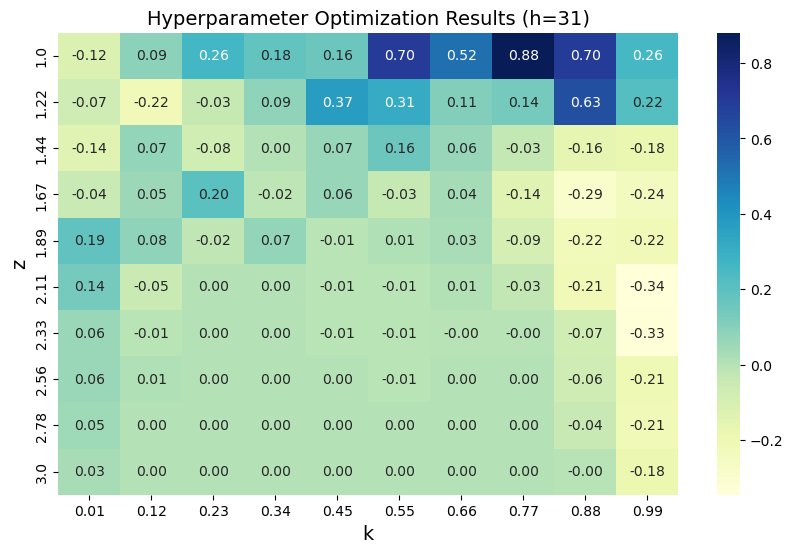

In [18]:
# Define a fixed value for the 'h' hyperparameter
fixed_h = 31

# Filter the data for the fixed 'h' value
filtered_data = storage[storage['h'] == fixed_h]

# Define a function to create a heatmap for a fixed 'h' value
def heatmap_fixed_h(x, y, metric, values, title=''):
    # Create a DataFrame with the selected columns
    df1 = values[[x, y, metric]]
    
    # Round the 'z' and 'k' columns to two decimal places using .loc[]
    df1.loc[:, 'z'] = df1['z'].round(2)
    df1.loc[:, 'k'] = df1['k'].round(2)
    
    # Group by the combinations of x and y, calculate the mean of the metric
    heat = df1.groupby([x, y]).mean()[metric]
    
    # Reshape the data to form a grid
    heat = heat.unstack()
    
    # make plot
    f, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(heat, annot=True, fmt=".2f", cmap="YlGnBu")
    ax.set_title(title,size = 14)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel(y, size = 14)
    ax.set_ylabel(x, size = 14)
    #ax.collections[0].colorbar.set_label(metric, size = 14)
    plt.show()

# Call the heatmap function with the appropriate parameters
heatmap_fixed_h('z', 'k', 'profits', filtered_data, title=f'Hyperparameter Optimization Results (h={fixed_h})')


# Trading Strategy 

In [20]:
df_copy = Data.copy()

#k,z, h, p = storage.iloc[-1,:] THESE ARE THE OPTIMAL PARAMETERS GIVING THE HIGHEST PROFITS 
k,z, h = 0.772222, 1, 31

df_copy = Data.copy()
#
df_copy["Filter"] = df_copy["sentiment"].ewm(alpha=k, adjust=False).mean()
df_copy["Filter Error"] = df_copy["sentiment"] - df_copy["Filter"]
df_copy["std"] = df_copy["Filter Error"].ewm(alpha=k, adjust=False).std()
df_copy["Upper"] = df_copy["Filter"] + z*df_copy["std"]
df_copy["Lower"] = df_copy["Filter"] - z*df_copy["std"]

df_copy["test"] = np.where(df_copy["Filter Error"].abs()>z*df_copy["std"], -1, 0)*np.sign(df_copy["Filter Error"])

daily = pd.date_range(Data.index[0], Data.index[-1])

daily = pd.DataFrame(df_copy[["test", 'sentiment', 'Filter', 'Lower', 'Upper']], index = daily).fillna(0)


daily[str(h)+"_signal"] = 0
for j in range(len(daily.index)):
    if daily.iloc[j,:]['test'] != 0:
        daily.loc[daily.index[j:j + h + 1],str(h) + "_signal" ] = daily.iloc[j, :]['test']
daily['asset'] = asset
daily['asset'] = daily['asset'].ffill()
daily['sentiment'] = daily['sentiment'].ffill()
daily['Filter'] = daily['Filter'].ffill()
daily['Lower'] = daily['Lower'].ffill()
daily['Upper'] = daily['Upper'].ffill()



daily['returns'] = np.log(daily['asset']).diff()

daily["cumulative_returns"] = np.exp((daily[str(h) + "_signal"].shift() * daily.returns).cumsum()) - 1
daily["strat_returns"] = daily[str(h) + "_signal"].shift() * daily.returns

    
# cumReturns= np.exp((data['signal'].shift()*data['returns']).cumsum())-1

## Kalman Filter and Sentiments

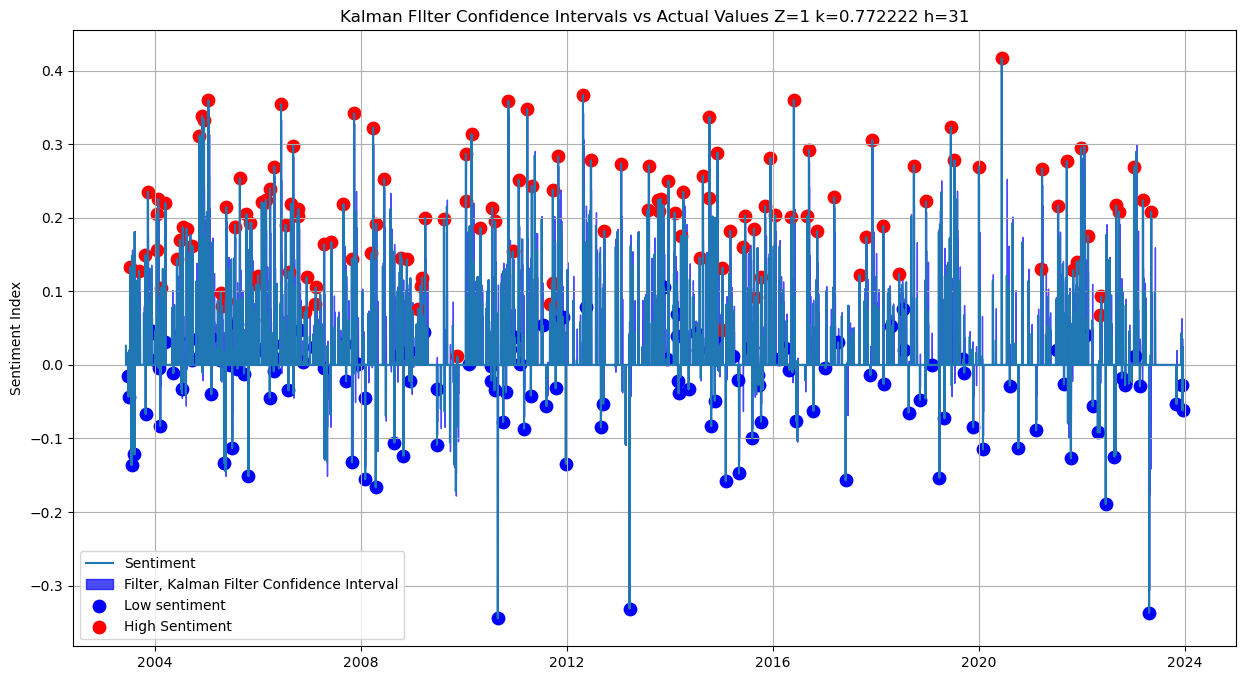

In [21]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.set_title("Kalman FIlter Confidence Intervals vs Actual Values " + "Z="+str(z) + " k=" + str(k)+ " h=" + str(h))
ax.set_ylabel("Sentiment Index")
ax.plot(daily["sentiment"])


ax.fill_between(daily.index, daily.Lower, daily.Upper, color='b', alpha=.7)
ax.scatter(daily[daily.test == 1].index, daily[daily.test == 1]["sentiment"], color = "blue", s = 80)
ax.scatter(daily[daily.test == -1].index, daily[daily.test == -1]["sentiment"], color = "red", s = 80)

#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])

ax.legend(["Sentiment", 'Filter, '"Kalman Filter Confidence Interval", 'Low sentiment', 'High Sentiment'])
ax.grid()

### Trading Positions- Fail/Success

In [14]:
daily = daily.copy()
daily["success"] = ((daily[daily.test != 0]["cumulative_returns"].diff()>0)*1).shift(-1)

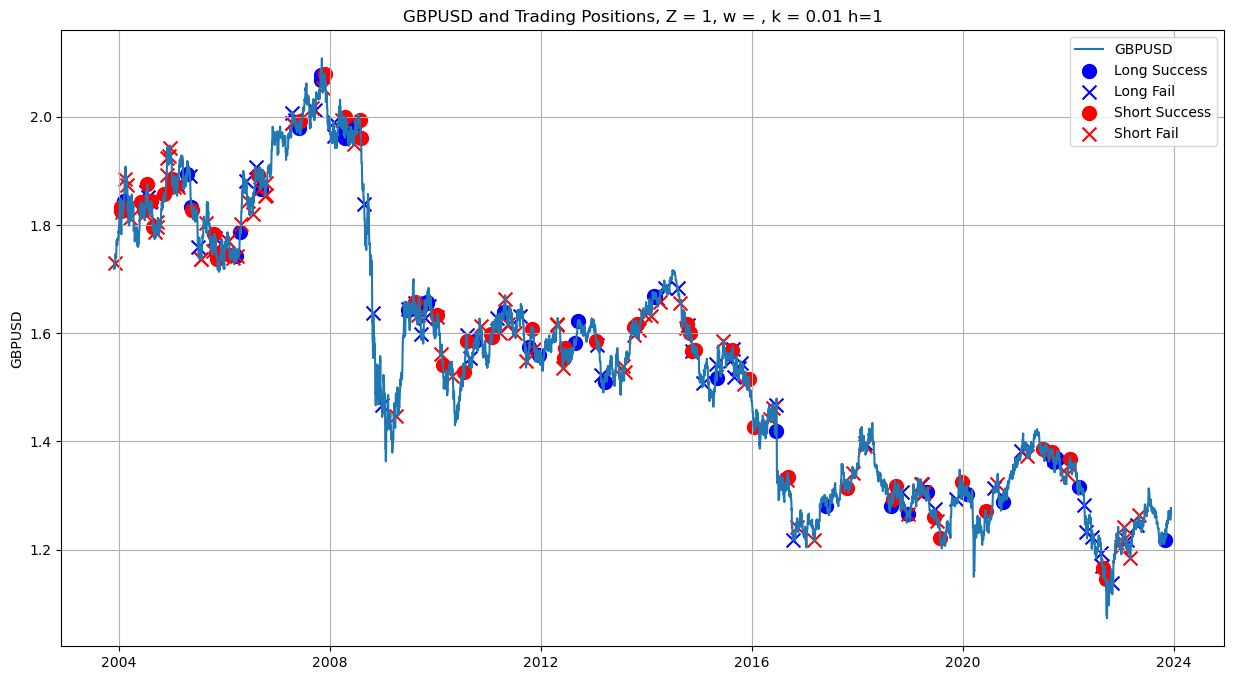

In [15]:
plt.figure(figsize = (15, 8))

plt.title("GBPUSD and Trading Positions"+ ", Z = "+str(z) + ", w = " + ", k = " + str(k)+ " h=" + str(h))
plt.ylabel("GBPUSD")
plt.plot(daily["asset"])

longsuccess = daily[(daily["success"] == 1) & (daily["test"] == 1)]
longfail = daily[(daily["success"] == 0) & (daily["test"] == 1)] 
shortsuccess = daily[(daily["success"] == 1) & (daily["test"] == -1)]
shortfail = daily[(daily["success"] == 0) & (daily["test"] == -1)]

plt.scatter(longsuccess.index, longsuccess["asset"], color = 'blue', s = 100)
plt.scatter(longfail.index, longfail["asset"], color = 'blue', s = 100, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["asset"], color = 'red', s = 100)
plt.scatter(shortfail.index, shortfail["asset"], color = 'red', s = 100, marker = "x")

plt.legend(["GBPUSD", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

## Equity Curve

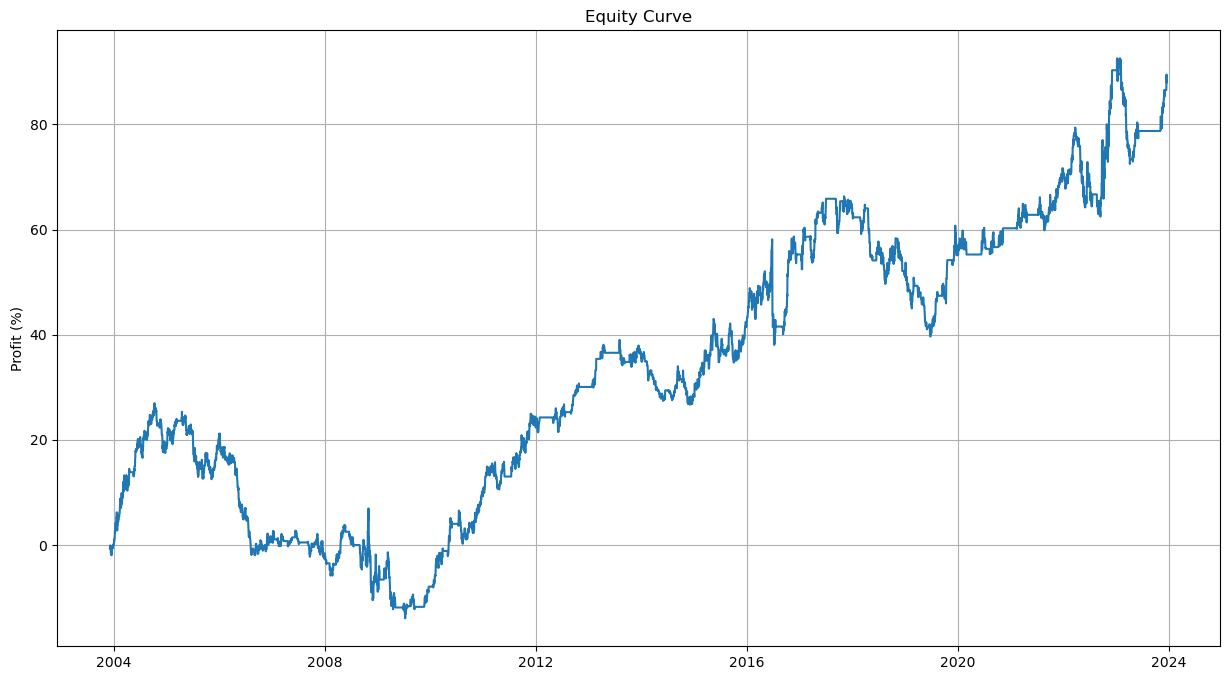

In [15]:
plt.figure(figsize = (15, 8))
plt.title("Equity Curve")
plt.plot((daily["cumulative_returns"])*100)
plt.ylabel('Profit (%)')
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])

plt.grid()

# Sharpe (Strategy & S&P500) ~ Monthly

In [13]:
outcome = daily[['strat_returns', '31_signal']].copy()
outcome.columns = ['strat_returns', 'signal_action']

outcome['Open'] = daily.asset
outcome['signal'] = outcome['signal_action']

test = outcome[['strat_returns']].resample('M').sum()
test = np.exp(test[test.strat_returns != 0])-1
test['Open'] = outcome['Open'].resample('M').last().dropna()

In [14]:
from fredapi import Fred

# pull the risk free rate
API_KEY = 'ee4b8758a9f21d577d76c0b8c779e7d7'

fred = Fred(api_key=API_KEY)
rf = fred.get_series('DGS1') # after this, rf is daily

In [15]:
rf = rf.resample('m').last()
rf = ((rf/100)+1)**(1/12)-1  # now, rf is monthly

In [80]:
rf.resample('M').last()

1962-01-31    1.875792e-09
1962-02-28    1.830834e-09
1962-03-31    1.695769e-09
1962-04-30    1.752081e-09
1962-05-31    1.707035e-09
                  ...     
2023-11-30    2.917677e-09
2023-12-31    2.712885e-09
2024-01-31    2.679613e-09
2024-02-29    2.834733e-09
2024-03-31    2.829200e-09
Freq: M, Length: 747, dtype: float64

In [16]:
test['rf'] = rf.resample('M').last()
test = test.drop(['Open'], axis = 1)
test['excess_s'] = test['strat_returns'] - test['rf']

sharpe = (test['excess_s'].mean()/test['excess_s'].std())*np.sqrt(12)
print('Strategy Monthly Sharpe (2003-12-31 to 2023-12-31): ', sharpe)

Strategy Monthly Sharpe (2003-12-31 to 2023-12-31):  0.26253001528788455


In [17]:
sector = "^GSPC"
sector = yf.download(sector)[["Adj Close"]].copy()
## for daily sharpe : sector = (np.exp(np.log(sector).diff().cumsum()) - 1)        
sector = (np.exp(np.log(sector).diff().resample('M').sum())-1)
test['SP500'] = sector[sector.index.year >1999].copy()

[*********************100%%**********************]  1 of 1 completed


In [18]:
test['sp_excess'] = test['SP500'] - test['rf']
sharpe_sp = (test['sp_excess'].mean()/test['sp_excess'].std())*np.sqrt(12)

print("S&P500 Monthly Sharpe : ", sharpe_sp)

S&P500 Monthly Sharpe :  0.5076240831681916


# Alpha & Beta

In [19]:
import statsmodels.formula.api as smf
test_ab = test*100
model = smf.ols('excess_s ~ sp_excess', test_ab).fit()
#test = test/100
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               excess_s   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7193
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.397
Time:                        16:10:38   Log-Likelihood:                -494.80
No. Observations:                 217   AIC:                             993.6
Df Residuals:                     215   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1599      0.163      0.981      0.328      -0.162       0.481
sp_excess      0.0320      0.038      0.848      0.397      -0.042       0.106
==============================================================================
Omnibus:                        9.708   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               12.574
Skew:                          -0.329   Prob(JB):                      0.00186
Kurtosis:                       3.979   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Strategy Monthly Sharpe Ratio (2003-12-31 to 2023-12-31):** The Sharpe ratio is a measure of risk-adjusted return, calculated by dividing the strategy's average monthly return by its standard deviation of returns. A higher Sharpe ratio indicates better risk-adjusted performance. In this case, the strategy's monthly Sharpe ratio is 0.2625. This suggests that the strategy has a relatively low risk-adjusted return compared to the S&P500, which has a Sharpe ratio of 0.5076. A Sharpe ratio above 1 is generally considered good, so the strategy might need improvement in terms of risk-adjusted returns.

**Alpha:** Alpha measures the excess return of the strategy compared to a benchmark (in this case, the S&P500) after adjusting for risk. A positive alpha indicates that the strategy has outperformed the benchmark, while a negative alpha suggests underperformance. The alpha value provided (15.99) suggests that the strategy has a positive excess return compared to the S&P500.

**Beta:** Beta measures the sensitivity of the strategy's returns to changes in the benchmark's returns. A beta of less than 1 indicates lower volatility compared to the benchmark, while a beta greater than 1 suggests higher volatility. The provided beta value (0.0320) suggests that the strategy's returns are relatively less volatile compared to the S&P500.

# Binomial Test

**Standard Binomial Test (Binomial Directional Test):**
- The null hypothesis for this test is that our directional forecasts are uncorrelated with the realized directional changes.
- If we reject the null hypothesis, it suggests that our directional forecasts successfully captured the realized appreciation or depreciation of exchange rates.

In [20]:
test_frame = daily.copy()
test_frame['Open'] = test_frame.asset

test_frame['D'] = test_frame['31_signal']

test_frame['p_current'] = test_frame["Open"]
test_frame['p_future'] = test_frame["Open"].shift(-1)
test_frame = test_frame.iloc[:-1,:]
test_frame['R'] = np.where(test_frame['p_future'] >= test_frame['p_current'], 1, -1)

# Compute realized changes
test_frame['R'] = np.where(test_frame['p_future'] >= test_frame['p_current'], 1, -1)

## Sample Covariance
test_frame['W'] = ((test_frame['D']-np.mean(test_frame['D']))*
                   (test_frame['R']-np.mean(test_frame['R'])))

T_B = np.mean(test_frame['W'])

## Newey-West LRV estimator
dy = test_frame['W'] - np.mean(test_frame['W'])
gamma_0 = sum((dy)**2)/len(test_frame)
gamma_1 = np.mean((dy*dy.shift(-1))[:len(test_frame)-1])
LRV = gamma_0 + 2*(1-1/2)*gamma_1



## Test-statistic
from scipy.stats import norm

statistic = T_B/np.sqrt(LRV/test_frame.shape[0])
print('Test statistic : ', statistic, ', 5 % critical value : ',
      round(norm.ppf(0.95),2))

Test statistic :  0.04625423773806855 , 5 % critical value :  1.64


**Weighted Binomial Test (Weighted Directional Test):**

- The null hypothesis for this test is that the expected value of our weighted directional forecasts is zero.
- If we reject the null hypothesis, it suggests that our directional forecasts successfully captured the big movements of the realized appreciation or depreciation of exchange rates.

In [21]:
# Weighted Mean Computation
test_frame['W_2'] = test_frame['D']*(test_frame['p_future']-test_frame['p_current'])
T_WB = np.mean(test_frame['W_2'])

## Newey-West LRV estimator
dy_2 = test_frame['W_2'] - np.mean(test_frame['W_2'])
gamma_0 = ((dy_2)**2).sum()/len(test_frame)
gamma_1 = np.mean((dy_2*dy_2.shift(-1))[:len(test_frame)-1])
LRV_2 = gamma_0 + 2*(1-1/2)*gamma_1

## Test-statistic
statistic_2 = T_WB/np.sqrt(LRV_2/len(test_frame))

# Output
print('Test statistic : ', statistic_2, ', 5 % critical value : ',
      round(norm.ppf(0.95),2))


Test statistic :  1.616936041270716 , 5 % critical value :  1.64


# Monthly & Yearly Returns

In [24]:
mrets = np.exp(daily['strat_returns'].resample('M').sum())-1
yrets = np.exp(daily['strat_returns'].resample('Y').sum())-1

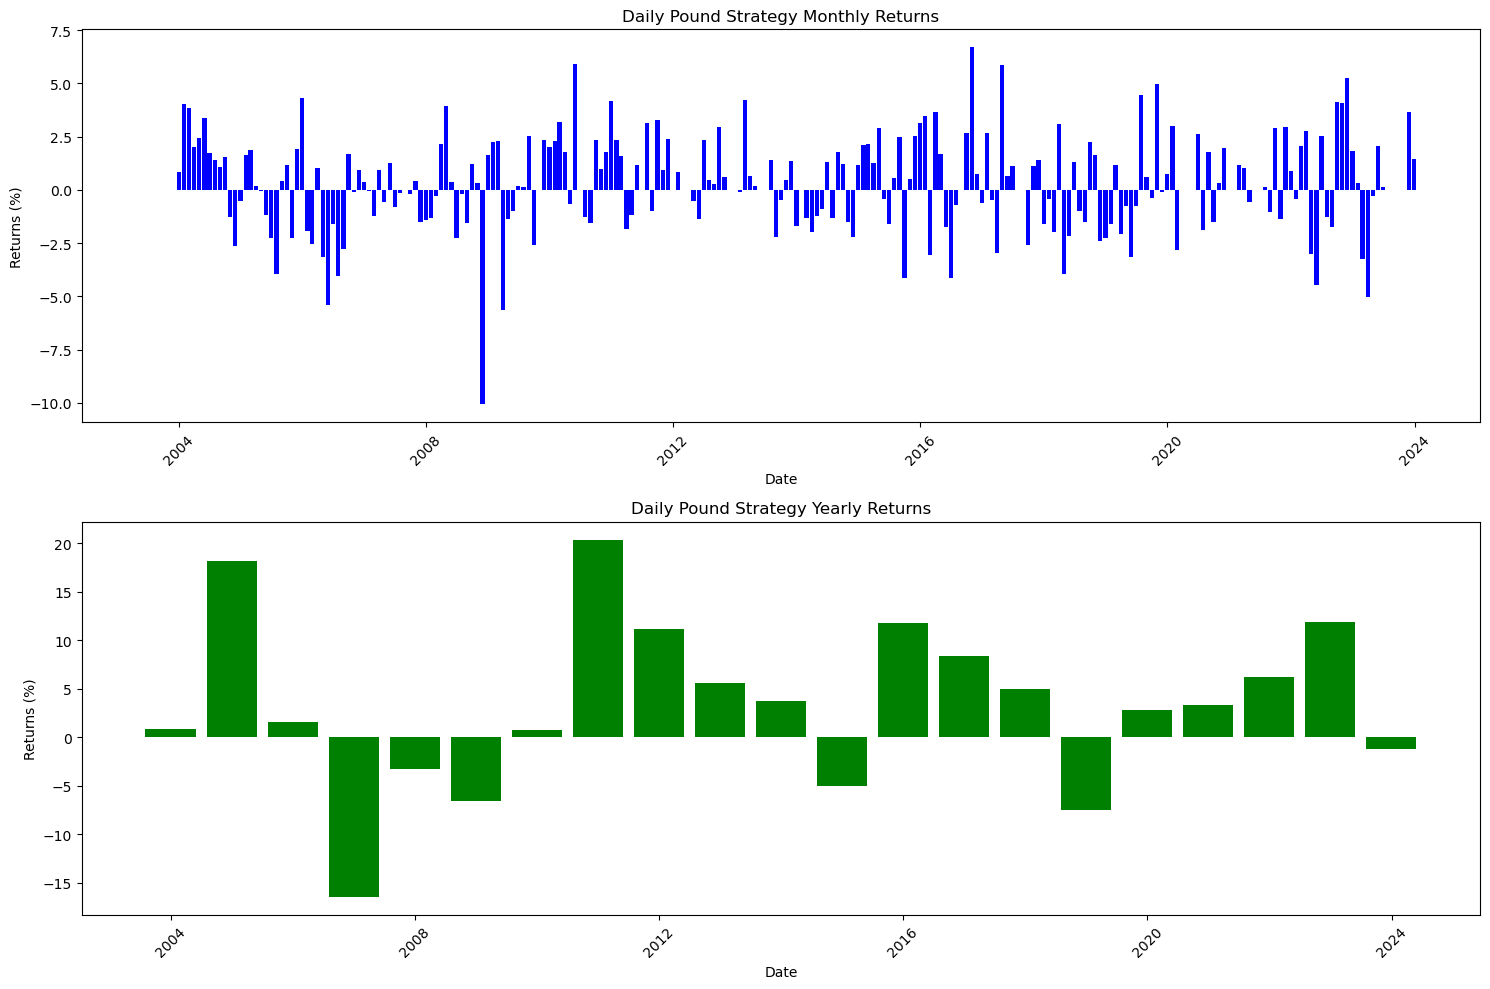

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Plotting the monthly returns
ax[0].bar(mrets.index, mrets.values*100, color='blue', width = 25)
ax[0].set_title("Daily Pound Strategy Monthly Returns")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Returns (%)")
ax[0].tick_params(axis='x', rotation=45)

# Plotting the yearly returns
ax[1].bar(yrets.index, yrets.values*100, color='green', width = 300)
ax[1].set_title("Daily Pound Strategy Yearly Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Returns (%)")
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Gini Coefficient

In [27]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.concat([pd.DataFrame({ 'Returns': [0]}), LorenzCurve])
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini.iloc[0])

In [28]:
#  aggregate the log  returns at the monthly level and then convert to simple returns (using np.exp()-1)
#returns_m = np.exp((daily['strat_returns']).resample('M').sum())-1

returns_m = np.exp((daily['strat_returns'].dropna()).resample('M').sum())-1
returns_m = pd.DataFrame(returns_m)
returns_m.columns = ['Returns']

returns_g = returns_m[['Returns']]
#returns_g.columns = ['Returns']
GINI_COEF(np.log(returns_g+1))

0.7228494538638176

# Sharpe + Alpha, Beta : rf=1.47%

In [29]:
rf_annual = 0.0147
rf_monthly = (1 + rf_annual) ** (1/12) - 1
# make sure returns df is in percentage units
#returns_m = returns_m*100
#returns_m['SP500'] = (yf.download('^GSPC')[['Adj Close']].pct_change()+1).resample('M').prod()-1

# get the excess return for both the benchmark and your returns
#returns_m['excess'] = returns_m['Returns'] - rf_monthly
#returns_m['excess_SP500'] = returns_m['SP500'] - rf_monthly

[*********************100%%**********************]  1 of 1 completed


In [30]:
test['excess_s2'] = test['strat_returns'] - rf_monthly

sharpe = (test['excess_s2'].mean()/test['excess_s2'].std())*np.sqrt(12)
print('Strategy Monthly Sharpe (2003-12-31 to 2023-12-31): ', sharpe)

Strategy Monthly Sharpe (2003-12-31 to 2023-12-31):  0.2907425266840605


In [31]:
sector = "^GSPC"
sector = yf.download(sector)[["Adj Close"]].copy()
## for daily sharpe : sector = (np.exp(np.log(sector).diff().cumsum()) - 1)        
sector = (np.exp(np.log(sector).diff().resample('M').sum())-1)
test['SP500'] = sector[sector.index.year >1999].copy()

test['excess_SP500_2'] = test['SP500'] - rf_monthly

[*********************100%%**********************]  1 of 1 completed


In [32]:
sharpe_sp = (test['excess_SP500_2'].mean()/test['excess_SP500_2'].std())*np.sqrt(12)

print("S&P500 Monthly Sharpe : ", sharpe_sp)

S&P500 Monthly Sharpe :  0.5223732379734878


In [34]:
import statsmodels.formula.api as smf
# Beta and Alpha
test2 = test*100
smf.ols('excess_s2~excess_SP500_2', data =test2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              excess_s2   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5437
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.462
Time:                        16:18:42   Log-Likelihood:                -492.69
No. Observations:                 217   AIC:                             989.4
Df Residuals:                     215   BIC:                             996.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1796      0.162      1.111      0.268      -0.139       0.498
excess_SP500_2     0.0276      0.037      0.737      0.462      -0.046       0.101
==============================================================================
Omnibus:                       10.520   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.466
Skew:                          -0.331   Prob(JB):                     0.000722
Kurtosis:                       4.078   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Up & Down Alpha, Beta, R-sq

In [55]:
# Up Beta and Alpha
updf = test2[test2.excess_SP500_2 > 0]
smf.ols('excess_s2~excess_SP500_2', data =updf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              excess_s2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.01775
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.894
Time:                        16:37:35   Log-Likelihood:                -293.47
No. Observations:                 136   AIC:                             590.9
Df Residuals:                     134   BIC:                             596.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2858      0.302      0.945      0.346      -0.312       0.884
excess_SP500_2     0.0102      0.076      0.133      0.894      -0.141       0.161
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.243
Skew:                          -0.065   Prob(JB):                        0.885
Kurtosis:                       3.162   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Down Beta and Alpha
downdf = test2[test2.excess_SP500_2 <0]
smf.ols('excess_s2~excess_SP500_2', data =downdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              excess_s2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.01552
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.901
Time:                        16:37:04   Log-Likelihood:                -195.55
No. Observations:                  81   AIC:                             395.1
Df Residuals:                      79   BIC:                             399.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0474      0.454     -0.104      0.917      -0.952       0.857
excess_SP500_2    -0.0117      0.094     -0.125      0.901      -0.198       0.175
==============================================================================
Omnibus:                        8.154   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.052
Skew:                          -0.516   Prob(JB):                       0.0108
Kurtosis:                       4.271   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation

In [58]:
test2.excess_s.corr(test2.excess_SP500_2)

0.0513150371599999

In [59]:
test['strat_returns'].corr(test['SP500'])

0.05022210147340079

# High & Low Month

In [35]:
# get high month and value 
imax = returns_m['Returns'].idxmax()
returns_m.loc[imax,:]['Returns'], returns_m.loc[imax,:].name

(0.06700971423109459, Timestamp('2016-10-31 00:00:00'))

In [36]:
# get low month and value 
imin = returns_m['Returns'].idxmin()
returns_m.loc[imin,:]['Returns'], returns_m.loc[imin,:].name

(-0.10076672351696059, Timestamp('2008-11-30 00:00:00'))

# % Winning Months

In [37]:
# Calculate the number of months with positive returns
nwin = (returns_m >0).sum().iloc[0]

# calculate the precentage of total
nwin/returns_m.shape[0]*100

51.037344398340245

# Monthly Max Drawdown

In [45]:
dd_frame = (returns_m[['Returns']]+1).cumprod()*100
dd_frame.columns = ['creturn']

# maximum value of returns reached by a given date
dd_frame['cmax'] = dd_frame.cummax()

# max drawdown i sometimes reported as a negative value, but it means the same thing
dd_frame['drawdowns'] = (dd_frame['cmax']-dd_frame['creturn'])/dd_frame['cmax']

# this is the max drawdown
max_drawdown = dd_frame['drawdowns'].max()

# Find the date (index) of the max drawdown
max_drawdown_date = dd_frame['drawdowns'].idxmax()

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Date of Maximum Drawdown: {max_drawdown_date}")

Maximum Drawdown: 0.2931265821059269
Date of Maximum Drawdown: 2009-05-31 00:00:00


In [43]:
dd_frame = (returns_m[['Returns']]+1).cumprod()*100
dd_frame

,Returns
2003-12-31,100.833949
2004-01-31,104.911831
2004-02-29,108.962757
2004-03-31,111.140579
2004-04-30,113.852565
...,...
2023-08-31,178.764133
2023-09-30,178.764133
2023-10-31,178.764133
2023-11-30,185.330751


# Annualized Return

In [50]:
daily2 = daily.dropna()
t = (daily2.index[-1] - daily2.index[0]).days / 365

A = (daily2['cumulative_returns'].iloc[-1] + 1)
strategy_ar=(((A)**(1/t)) - 1)*100

print("Annualized Return for the Strategy: ", round(strategy_ar, 4))

Annualized Return for the Strategy:  3.1998


# Geometric returns, Std

In [67]:
import numpy as np

# Calculate strategy's standard deviation
strategy_std = daily['strat_returns'].dropna().std()

# Calculate annualized standard deviation (assuming 12 months in a year)
annualized_strategy_std = strategy_std * np.sqrt(252)

# Calculate geometric average monthly returns
geometric_avg_monthly_returns = (1 + test['strat_returns']).prod() ** (1 / len(test['strat_returns'])) - 1

print("Strategy's Standard Deviation:", strategy_std)
print("Annualized Standard Deviation:", annualized_strategy_std)
print("Geometric Average Monthly Returns:", geometric_avg_monthly_returns)


Strategy's Standard Deviation: 0.004331247820213249
Annualized Standard Deviation: 0.06875642759324913
Geometric Average Monthly Returns: 0.002914278564904338


In [68]:
returns_m

,Returns,SP500,excess,excess_SP500
2003-12-31,0.008339,0.050766,0.007123,0.049549
2004-01-31,0.040442,0.017276,0.039225,0.016060
2004-02-29,0.038613,0.012209,0.037396,0.010992
2004-03-31,0.019987,-0.016359,0.018770,-0.017576
2004-04-30,0.024401,-0.016791,0.023185,-0.018008
...,...,...,...,...
2023-08-31,0.000000,-0.017716,-0.001217,-0.018933
2023-09-30,0.000000,-0.048719,-0.001217,-0.049936
2023-10-31,0.000000,-0.021980,-0.001217,-0.023197
2023-11-30,0.036733,0.089179,0.035517,0.087962
